In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew 

sns.set(font_scale=0.75)
%matplotlib notebook

# EDA

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(f'number columns: {len(train_df.columns)}')
train_df.columns

number columns: 81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Missing Data

In [4]:
total = train_df.isna().sum()[train_df.isna().sum() != 0]
percent = total/len(train_df)
msdata = pd.concat([total, percent], axis = 1, keys = ['total', 'percent']).sort_values('total', ascending = False)
msdata

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [5]:
train_df.drop(train_df[train_df.Electrical.isna()].index, inplace = True)
train_df.drop(msdata[msdata.index != 'Electrical'].index, axis = 1, inplace = True)

In [6]:
train_df.isna().sum()[train_df.isna().sum() != 0]

Series([], dtype: int64)

# Correlations

<IPython.core.display.Javascript object>


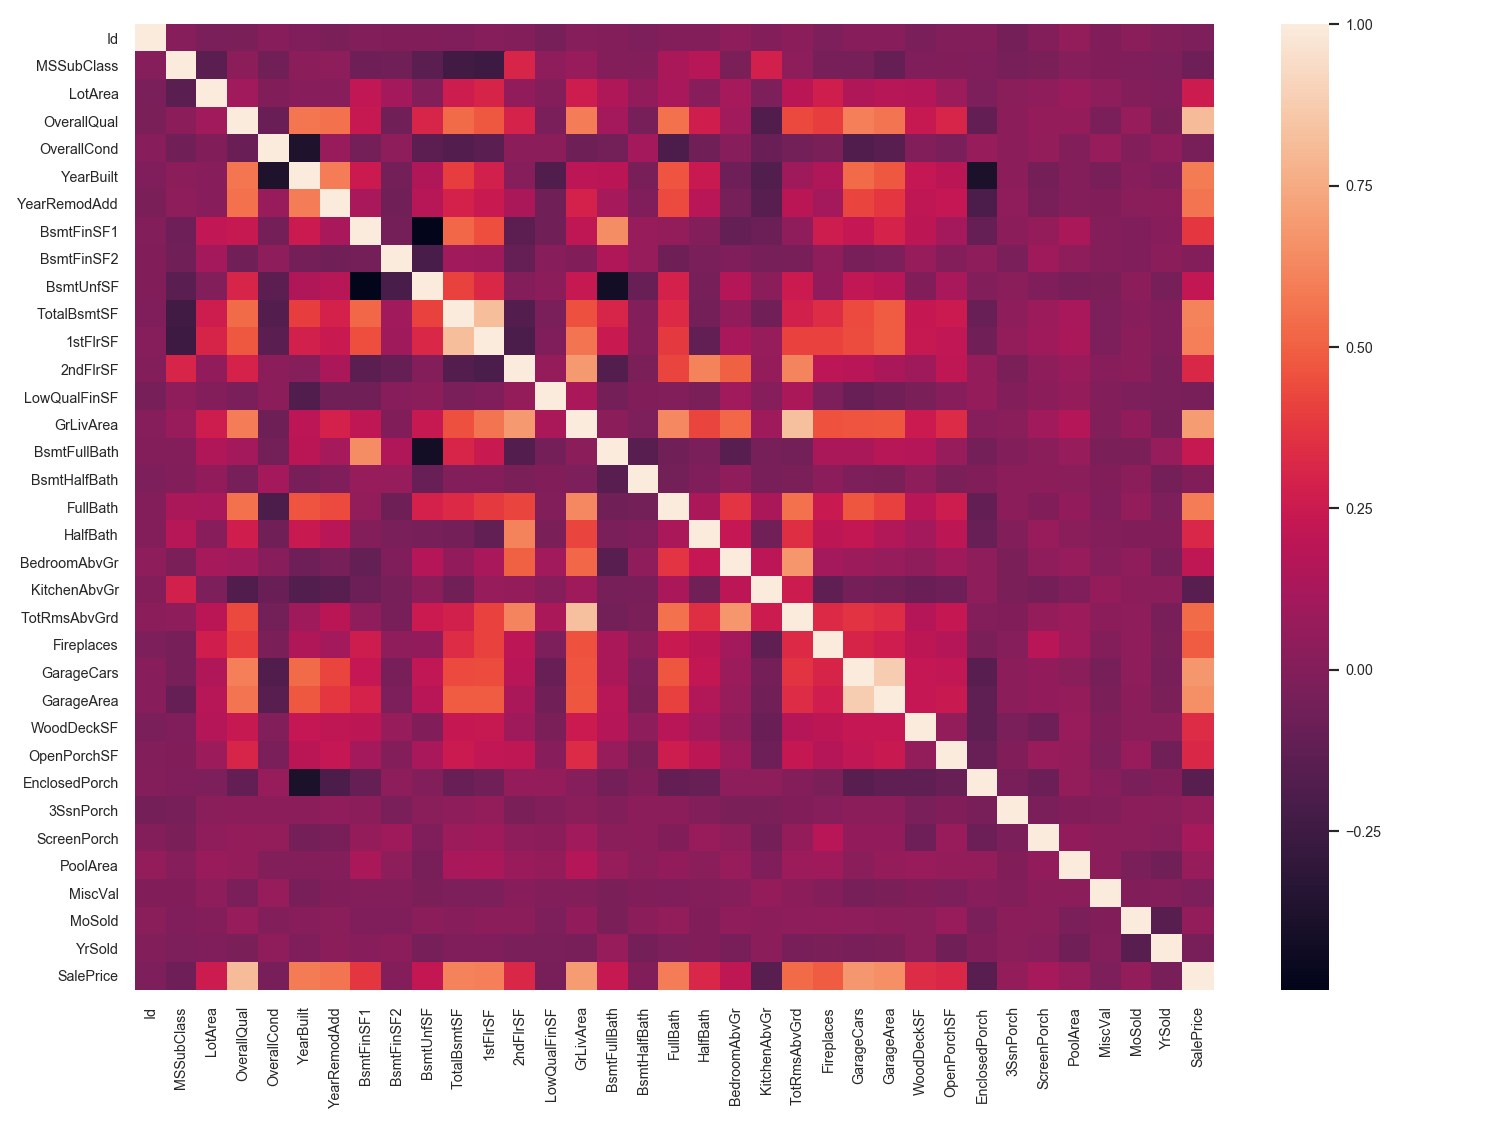

In [19]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)
plt.tight_layout()

In [8]:
cor_cols = train_df.corr().nlargest(10, 'SalePrice').SalePrice
cor_cols

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


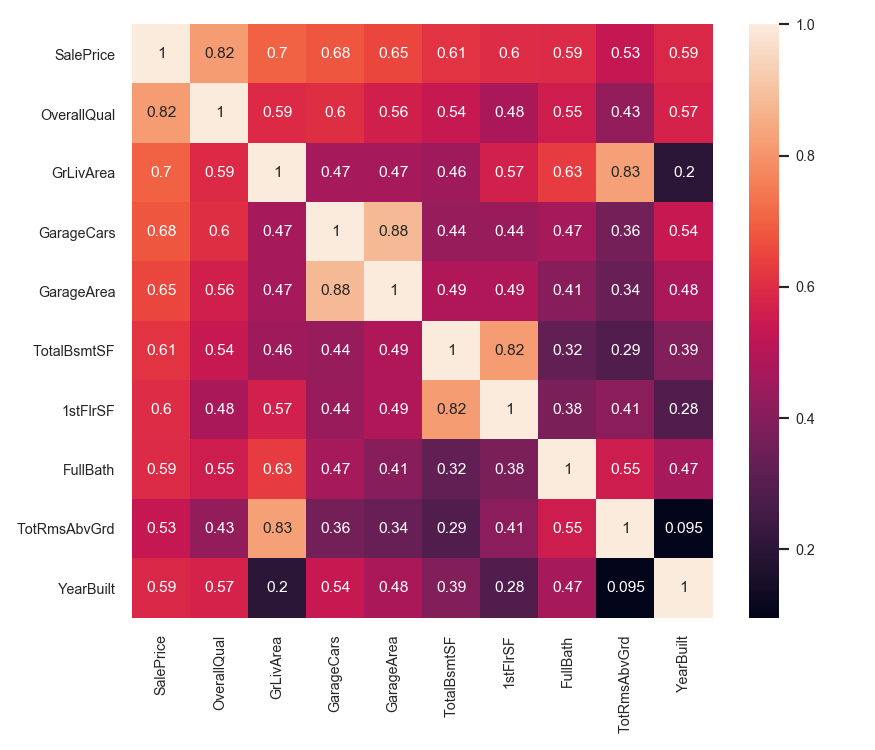

In [18]:
fig, ax = plt.subplots(figsize = (7,6))
sns.heatmap(train_df.loc[:,cor_cols.index].corr(), annot=True)
plt.tight_layout()

<IPython.core.display.Javascript object>


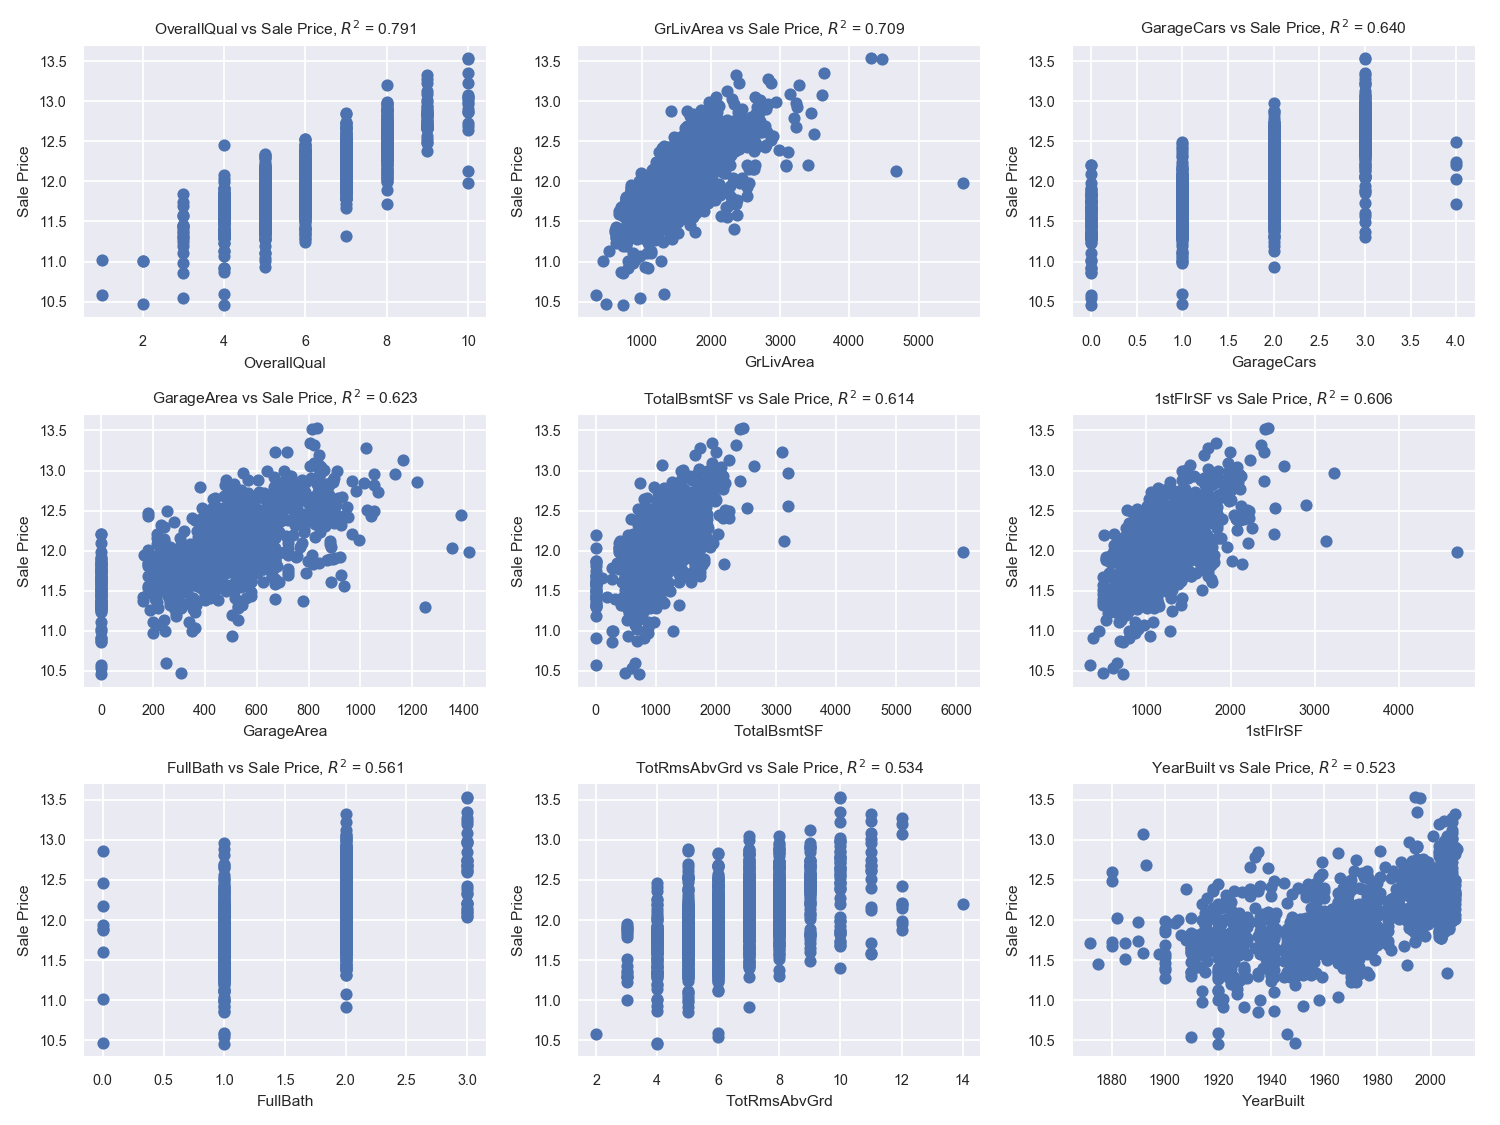

In [17]:
cols = cor_cols.index[1:]
fig, axes = plt.subplots(3,3, figsize = (12,9))
axes = axes.ravel()
for ax, col in zip(axes, cols):
    ax.scatter(train_df[col], train_df.SalePrice)
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')
    ax.set_title(f'{col} vs Sale Price, $R^2$ = {cor_cols[col]:.3f}')
plt.tight_layout()

# Examining Target Variable

<IPython.core.display.Javascript object>


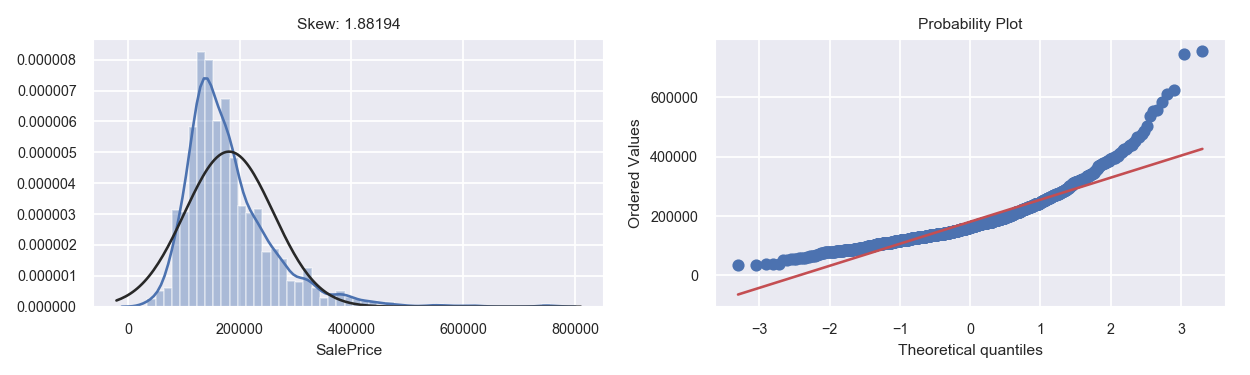

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.distplot(train_df.SalePrice, fit = norm, ax = ax1)
ax1.set_title(f'Skew: {train_df.SalePrice.skew():.5f}')
res = stats.probplot(train_df['SalePrice'], plot=ax2)
plt.tight_layout()

<IPython.core.display.Javascript object>


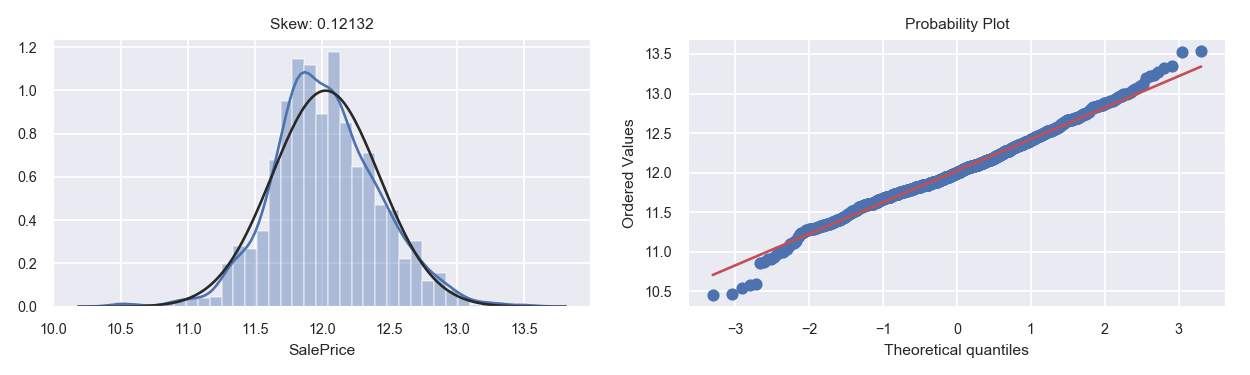

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [16]:
train_df.SalePrice = np.log(train_df.SalePrice)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.distplot(train_df.SalePrice, fit = norm, ax = ax1)
ax1.set_title(f'Skew: {train_df.SalePrice.skew():.5f}')
res = stats.probplot(train_df['SalePrice'], plot=ax2)
plt.tight_layout()

# Feature Transformation

In [20]:
int_features = train_df.dtypes[train_df.dtypes != 'object'].index
skewed_features = train_df[int_features].skew()[train_df[int_features].skew() > 0.75].index
train_df[skewed_features].skew()

MSSubClass        1.408620
LotArea          12.203431
BsmtFinSF1        1.685198
BsmtFinSF2        4.253594
BsmtUnfSF         0.919312
TotalBsmtSF       1.526760
1stFlrSF          1.376504
2ndFlrSF          0.814303
LowQualFinSF      9.008149
GrLivArea         1.365701
BsmtHalfBath      4.101759
KitchenAbvGr      4.486640
WoodDeckSF        1.540947
OpenPorchSF       2.363530
EnclosedPorch     3.088518
3SsnPorch        10.300725
ScreenPorch       4.120572
PoolArea         14.823236
MiscVal          24.468441
dtype: float64

In [21]:
train_df[skewed_features] = np.log1p(train_df[skewed_features]) # log leads to inf, use log1p
train_df[skewed_features].skew()

MSSubClass        0.250411
LotArea          -0.137073
BsmtFinSF1       -0.620441
BsmtFinSF2        2.522458
BsmtUnfSF        -2.185482
TotalBsmtSF      -5.156678
1stFlrSF          0.078925
2ndFlrSF          0.291254
LowQualFinSF      7.457630
GrLivArea        -0.006310
BsmtHalfBath      3.931468
KitchenAbvGr      3.867841
WoodDeckSF        0.154910
OpenPorchSF      -0.024778
EnclosedPorch     2.111121
3SsnPorch         7.732199
ScreenPorch       3.149024
PoolArea         14.358121
MiscVal           5.168742
dtype: float64

In [22]:
train_df = pd.get_dummies(train_df)
train_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,9.042040,7,5,2003,2003,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,9.169623,6,8,1976,1976,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,9.328212,7,5,2001,2002,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,9.164401,7,5,1915,1970,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,9.565284,8,5,2000,2000,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0


# Modelling

In [24]:
X = train_df.drop('SalePrice', axis = 1).values
y = train_df.SalePrice

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape, y_train.shape)

(1094, 221) (1094,)


In [26]:
alphas = np.dstack((np.logspace(-3,1,5), np.logspace(-3,1,5)*3)).ravel()
acc_lst = []
mse_lst = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    accuracy = ridge.score(X_test, y_test)
    acc_lst.append(accuracy)
    
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    mse_lst.append(mse)
    
print(f'Accuracy: {acc_lst}\nMSE: {mse_lst}')

Accuracy: [0.8317827617254532, 0.8319186799306586, 0.8323830757988722, 0.8336222082856891, 0.8371884444066596, 0.8437385613616214, 0.8528526257934951, 0.8587865952833997, 0.8618131032840777, 0.8602520397186375]
MSE: [0.02771529968845804, 0.027692905944338687, 0.027616392557282512, 0.027412234359358797, 0.026824664952879874, 0.0257454743998586, 0.024243850489608507, 0.023266175761133552, 0.022767531406317786, 0.023024730638647888]


<IPython.core.display.Javascript object>


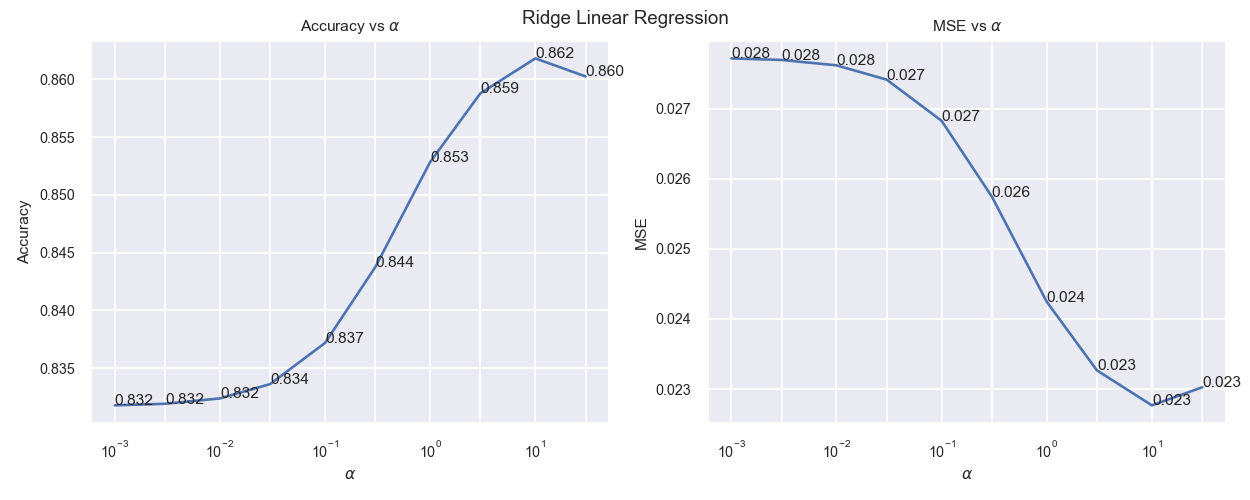

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Ridge Linear Regression')

ax1.semilogx(alphas, acc_lst)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel(r'$\alpha$')
ax1.set_title(r'Accuracy vs $\alpha$')
ax1.set_xticks(alphas)

ax2.semilogx(alphas, mse_lst)
ax2.set_ylabel('MSE')
ax2.set_xlabel(r'$\alpha$')
ax2.set_title(r'MSE vs $\alpha$')
ax2.set_xticks(alphas)

for alpha, acc, mse in zip(alphas, acc_lst, mse_lst):
    ax1.annotate(f'{acc:.3f}', (alpha, acc))
    ax2.annotate(f'{mse:.3f}', (alpha, mse))

plt.tight_layout()

<IPython.core.display.Javascript object>


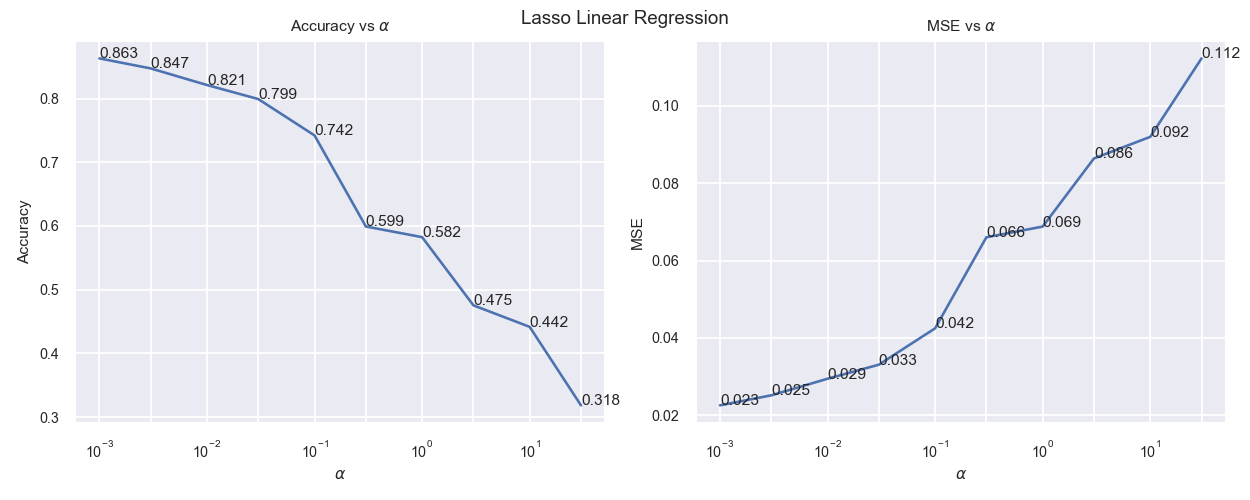

In [28]:
acc_lst = []
mse_lst = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    
    accuracy = lasso.score(X_test, y_test)
    acc_lst.append(accuracy)
    
    mse = mean_squared_error(y_test, lasso.predict(X_test))
    mse_lst.append(mse)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Lasso Linear Regression')

ax1.semilogx(alphas, acc_lst)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel(r'$\alpha$')
ax1.set_title(r'Accuracy vs $\alpha$')
ax1.set_xticks(alphas)

ax2.semilogx(alphas, mse_lst)
ax2.set_ylabel('MSE')
ax2.set_xlabel(r'$\alpha$')
ax2.set_title(r'MSE vs $\alpha$')
ax2.set_xticks(alphas)

for alpha, acc, mse in zip(alphas, acc_lst, mse_lst):
    ax1.annotate(f'{acc:.3f}', (alpha, acc))
    ax2.annotate(f'{mse:.3f}', (alpha, mse))

plt.tight_layout()

<IPython.core.display.Javascript object>


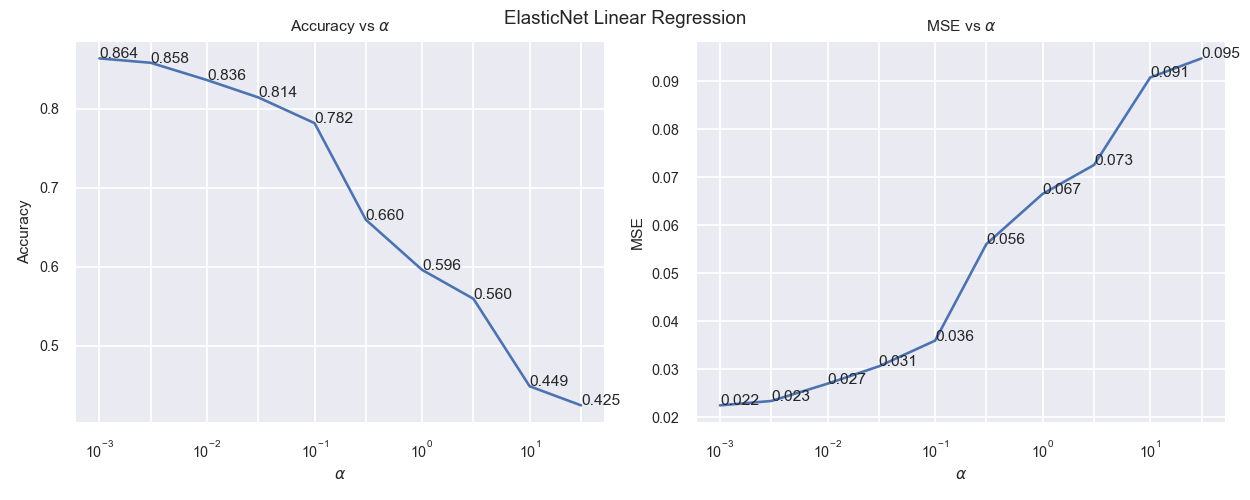

In [29]:
acc_lst = []
mse_lst = []

for a in alphas:
    elastic = ElasticNet(alpha=a)
    elastic.fit(X_train, y_train)
    
    accuracy = elastic.score(X_test, y_test)
    acc_lst.append(accuracy)
    
    mse = mean_squared_error(y_test, elastic.predict(X_test))
    mse_lst.append(mse)
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('ElasticNet Linear Regression')

ax1.semilogx(alphas, acc_lst)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel(r'$\alpha$')
ax1.set_title(r'Accuracy vs $\alpha$')
ax1.set_xticks(alphas)

ax2.semilogx(alphas, mse_lst)
ax2.set_ylabel('MSE')
ax2.set_xlabel(r'$\alpha$')
ax2.set_title(r'MSE vs $\alpha$')
ax2.set_xticks(alphas)

for alpha, acc, mse in zip(alphas, acc_lst, mse_lst):
    ax1.annotate(f'{acc:.3f}', (alpha, acc))
    ax2.annotate(f'{mse:.3f}', (alpha, mse))

plt.tight_layout()